Définition des méthodes

In [2]:
def print_color_repartition(mean_blue,mean_green,mean_red):
    plt.figure(figsize=(8, 5))
    
    plt.plot(mean_blue, color='blue', label="Bleu")
    plt.plot(mean_green, color='green', label="Vert")
    plt.plot(mean_red, color='red', label="Rouge")
    
    plt.title("Histogramme moyen des couleurs sur plusieurs images")
    plt.xlabel("Intensité des pixels (0-255)")
    plt.ylabel("Nombre moyen de pixels")
    plt.legend()
    plt.show()

def get_contrast(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray.std()

def get_blur(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def get_brightness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(gray)

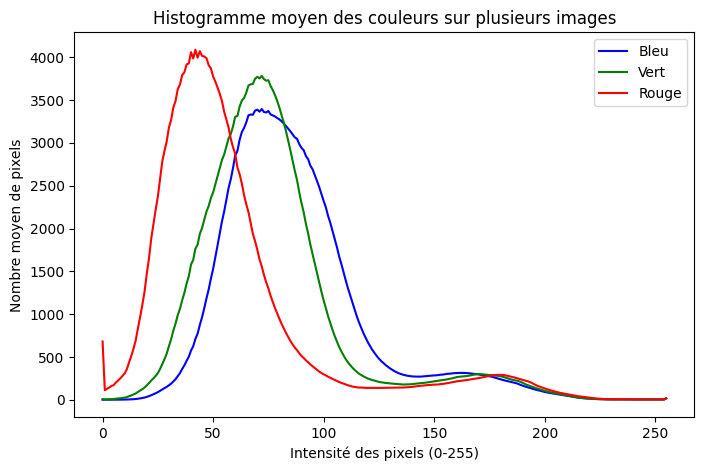

In [3]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

df_final = pd.DataFrame()

input_plant_folder = '/v2-plant-seedlings-dataset/'
exclude_folder = '/nonsegmentedv2'
df = pd.DataFrame(index=['width',
                         'height',
                         'channels',
                         'green_channel',
                         'total_intensity',
                         'green_ratio',
                         'red_ratio',
                         'blue_ratio',
                         'contrast',
                         'blur',
                         'brightness'])

#Calcul de la somme des couleurs
sum_blue = np.zeros(256)
sum_green = np.zeros(256)
sum_red = np.zeros(256)
num_images = 0

for dirname, _, filenames in os.walk('/kaggle/input'):
    if ((input_plant_folder in dirname) and (exclude_folder not in dirname)):
            espece = dirname.split('/')[-1]
            for filename in filenames:
                    #Exploration de toute les images
                    img = cv2.imread(dirname+'/'+filename)
                    imgClr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir en format RGB
                    height, width, channels = imgClr.shape
                    # Extraire les canaux de couleur
                    blue_channel = imgClr[:, :, 0]  # Canal Bleu
                    green_channel = imgClr[:, :, 1] # Canal Vert
                    red_channel = imgClr[:, :, 2]   # Canal Rouge

                    total_intensity = np.mean(green_channel) + np.mean(red_channel) + np.mean(blue_channel)
                    green_ratio = (np.mean(green_channel) / total_intensity) * 100
                    red_ratio = (np.mean(red_channel) / total_intensity) * 100
                    blue_ratio = (np.mean(blue_channel) / total_intensity) * 100

                    contrast = get_contrast(img)
                    brightness = get_brightness(img)
                    blur = get_blur(img)
                
                    data = pd.DataFrame(
                        {espece +'_'+ filename: [height, 
                                                 width,
                                                 channels,
                                                 np.mean(green_channel)
                                                 ,total_intensity
                                                 ,green_ratio
                                                 ,red_ratio
                                                 ,blue_ratio,
                                                 contrast,
                                                 blur,
                                                 brightness]
                        }, index=['width',
                                  'height',
                                  'channels',
                                  'green_channel',
                                  'total_intensity',
                                  'green_ratio',
                                  'red_ratio',
                                  'blue_ratio',
                                     'contrast',
                                     'blur',
                                     'brightness']
                    )
                    
                    df = pd.concat([df, data], axis=1)

                    # Calculer les histogrammes individuels
                    hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
                    hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
                    hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
                
                    # Ajouter les valeurs aux sommes
                    sum_blue += hist_blue.flatten()
                    sum_green += hist_green.flatten()
                    sum_red += hist_red.flatten()
                    num_images+=1

                    
df = df.T

mean_blue = sum_blue / num_images
mean_green = sum_green / num_images
mean_red = sum_red / num_images

#Génération du graphe
print_color_repartition(mean_blue, mean_green, mean_red)


In [14]:
print(df.info())
print(df.describe())

print('\n __LES FORMATS __ : \n')
print("Il y a",len(df['width'].unique()),"largeurs et",len(df['height'].unique()),"hauteurs d'image différentes.")
print("Donc 991 formats d'image.")
print('\n ________\n')

<class 'pandas.core.frame.DataFrame'>
Index: 5539 entries, Scentless Mayweed_173.png to Shepherd’s Purse_217.png
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   width            5539 non-null   float64
 1   height           5539 non-null   float64
 2   channels         5539 non-null   float64
 3   green_channel    5539 non-null   float64
 4   total_intensity  5539 non-null   float64
 5   green_ratio      5539 non-null   float64
 6   red_ratio        5539 non-null   float64
 7   blue_ratio       5539 non-null   float64
 8   contrast         5539 non-null   float64
 9   blur             5539 non-null   float64
 10  brightness       5539 non-null   float64
dtypes: float64(11)
memory usage: 519.3+ KB
None
             width       height  channels  green_channel  total_intensity  \
count  5539.000000  5539.000000    5539.0    5539.000000      5539.000000   
mean    354.783535   355.202022       3.0      73.653

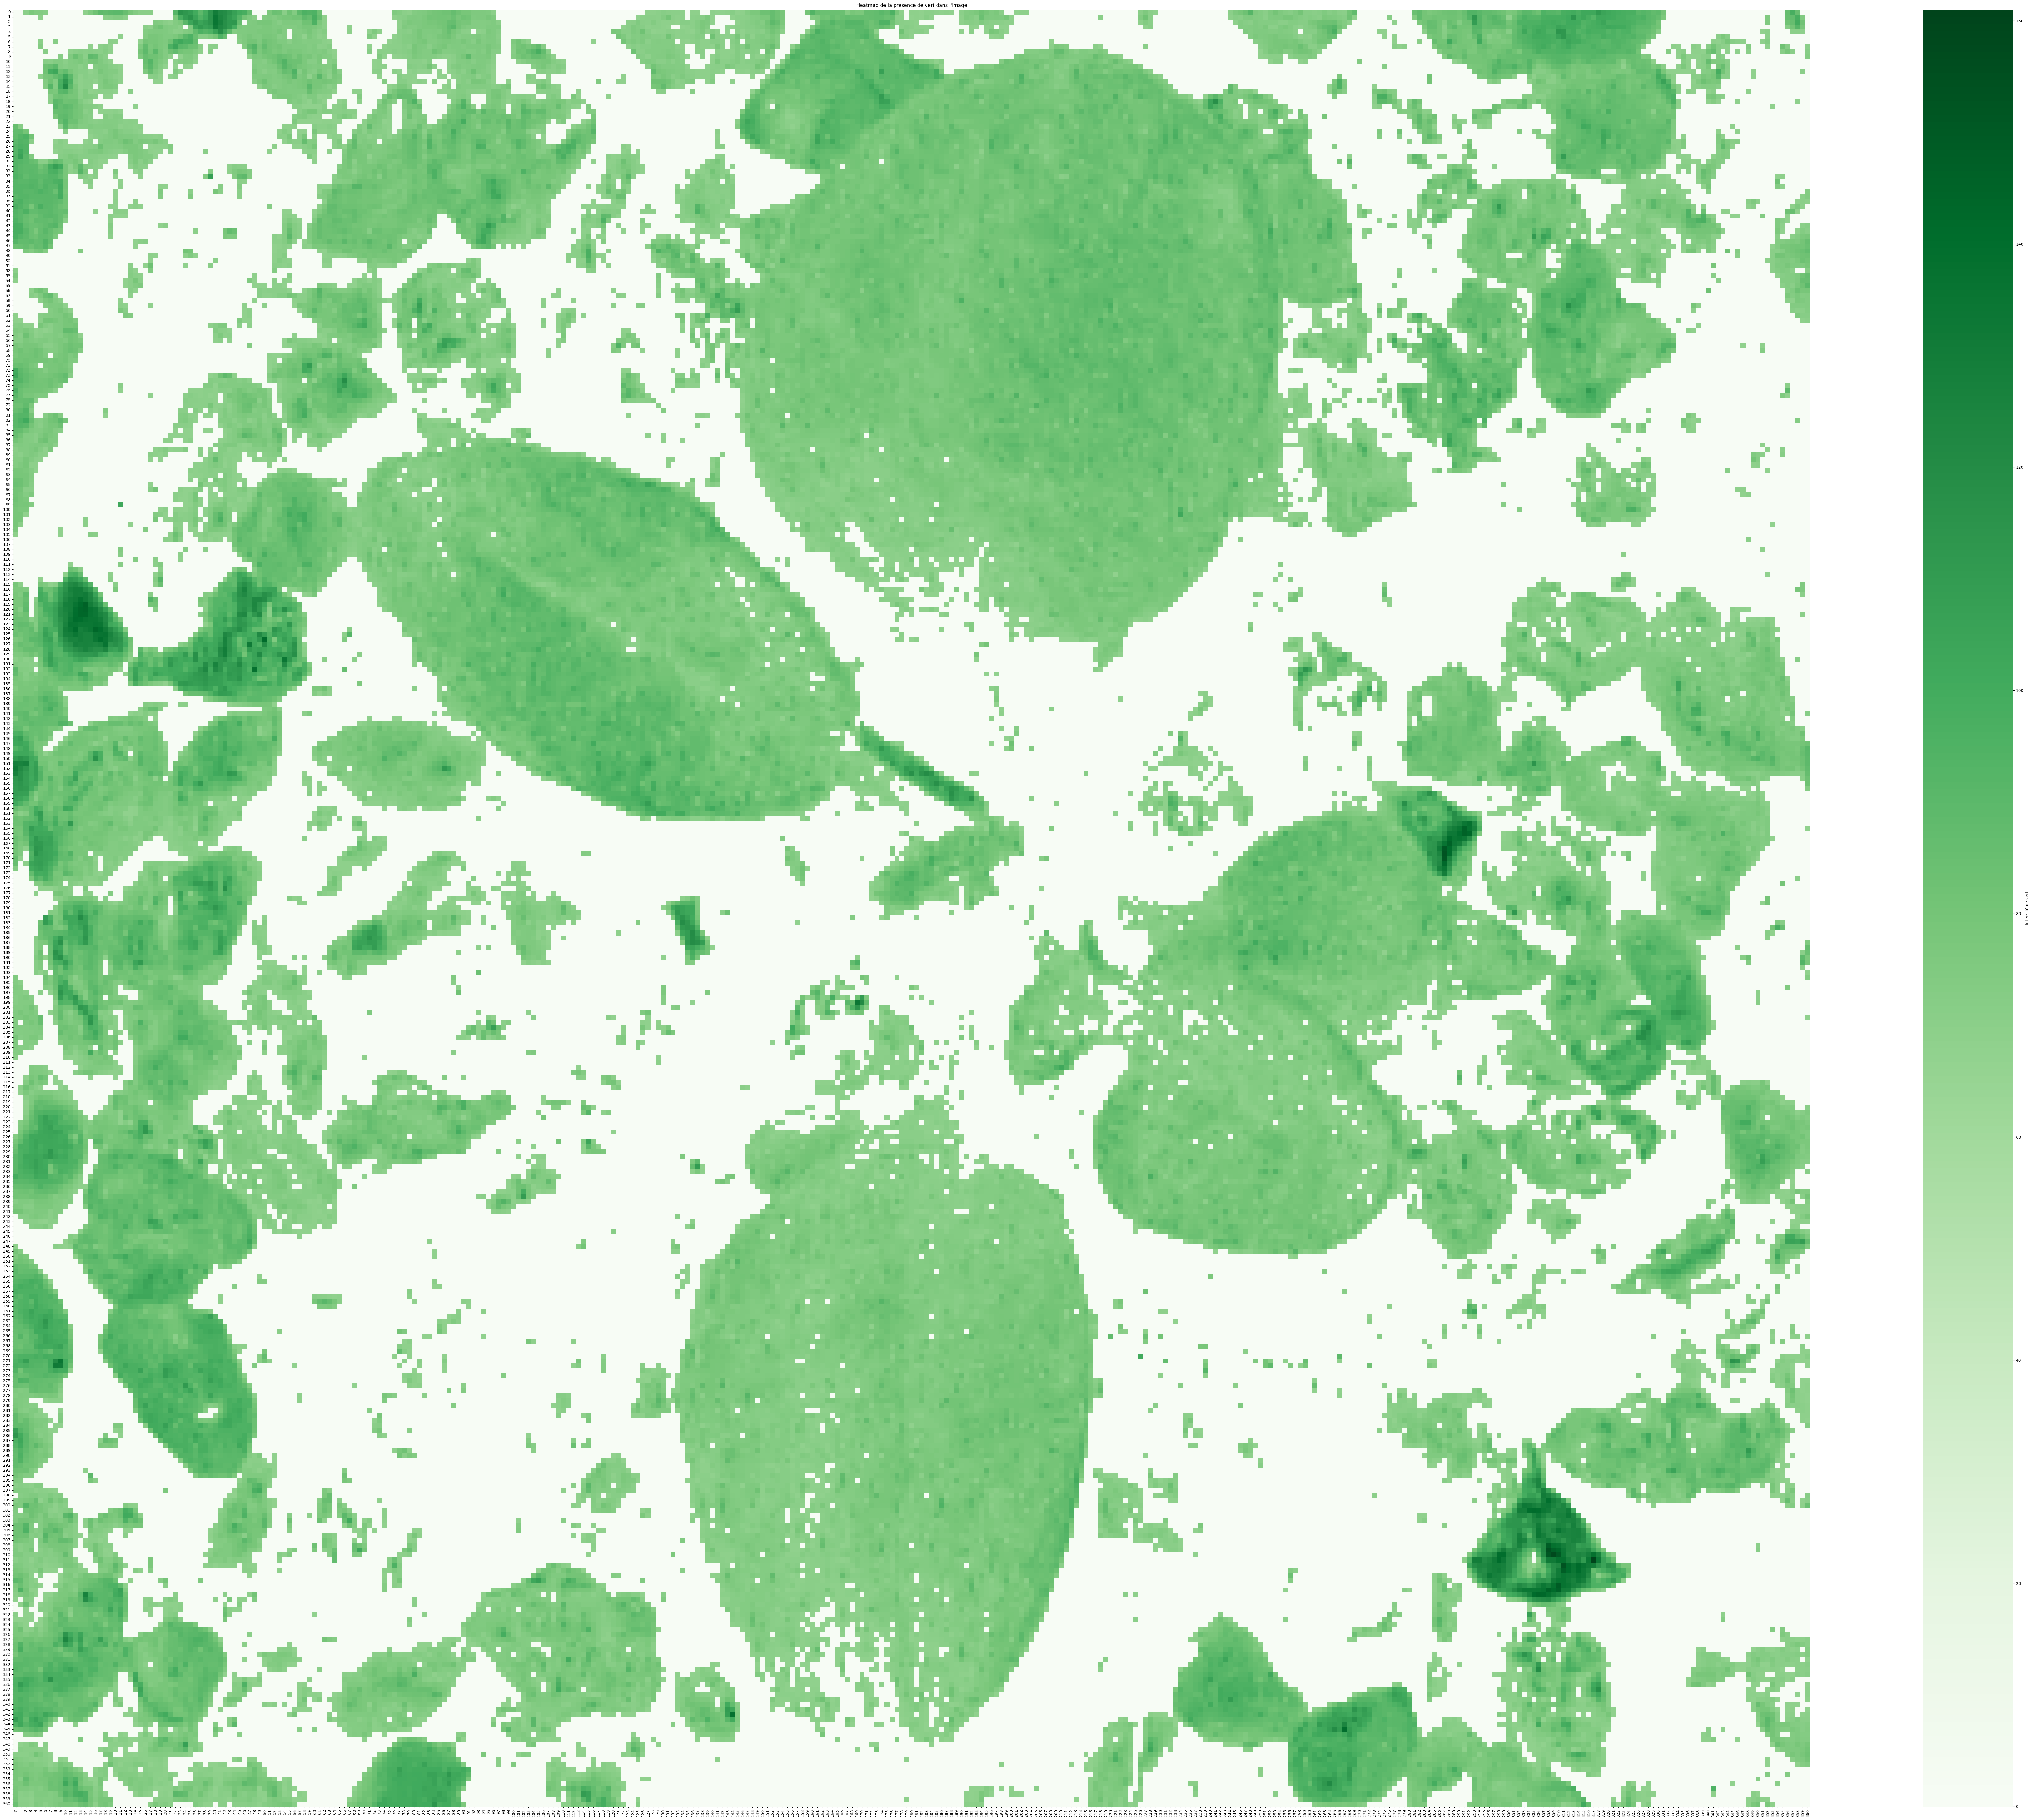

In [11]:
import seaborn as sns

mean_green = np.mean(green_channel)

plt.figure(figsize=(100, 80))
filtered_green_channel = np.where(green_channel >= mean_green, green_channel, 0)

# Afficher la heatmap avec Seaborn
sns.heatmap(filtered_green_channel, cmap='Greens', cbar_kws={'label': 'Intensité de vert'}, square=True)
#sns.heatmap(green_channel, cmap='Greens', cbar_kws={'label': 'Intensité de vert'}, square=True)
# Ajouter un titre
plt.title('Heatmap de la présence de vert dans l\'image')

# Afficher la heatmap
plt.show()

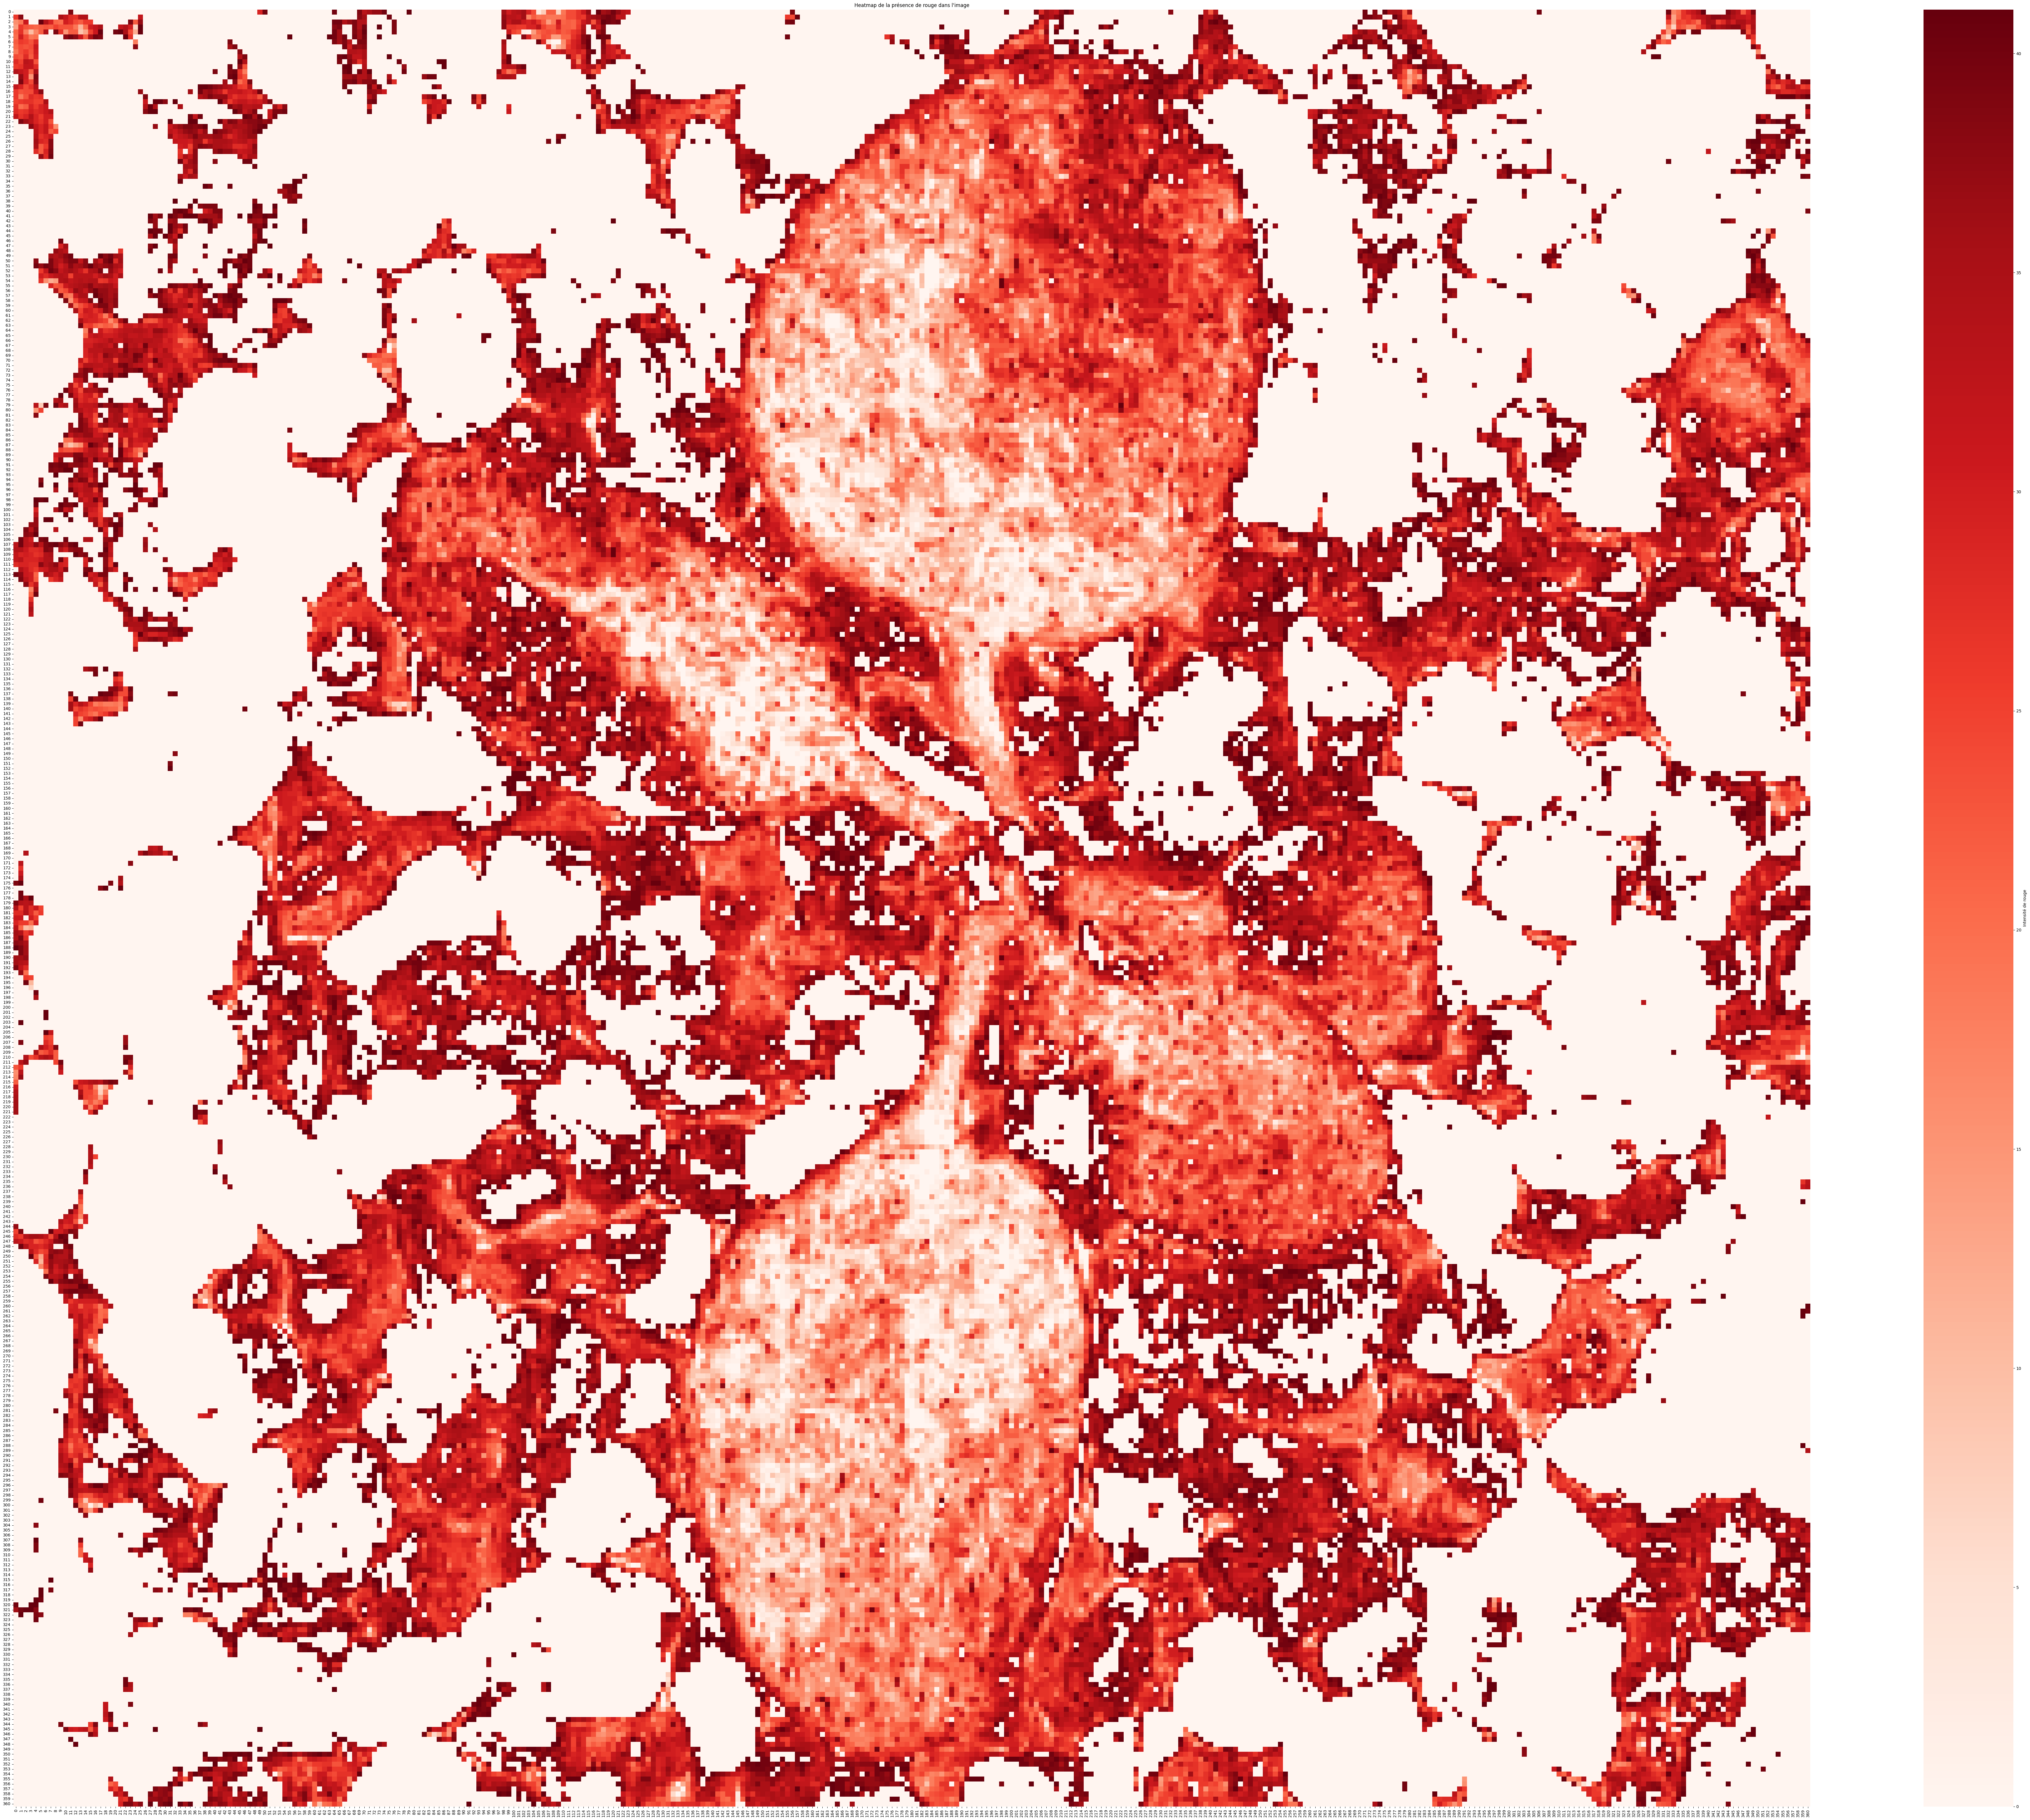

In [7]:
import seaborn as sns

mean_red = np.mean(red_channel)

plt.figure(figsize=(100, 80))
filtered_red_channel = np.where(red_channel <= mean_red, red_channel, 0)

# Afficher la heatmap avec Seaborn
sns.heatmap(filtered_red_channel, cmap='Reds', cbar_kws={'label': 'Intensité de rouge'}, square=True)
#sns.heatmap(red_channel, cmap='Reds', cbar_kws={'label': 'Intensité de vert'}, square=True)
# Ajouter un titre
plt.title('Heatmap de la présence de rouge dans l\'image')

# Afficher la heatmap
plt.show()

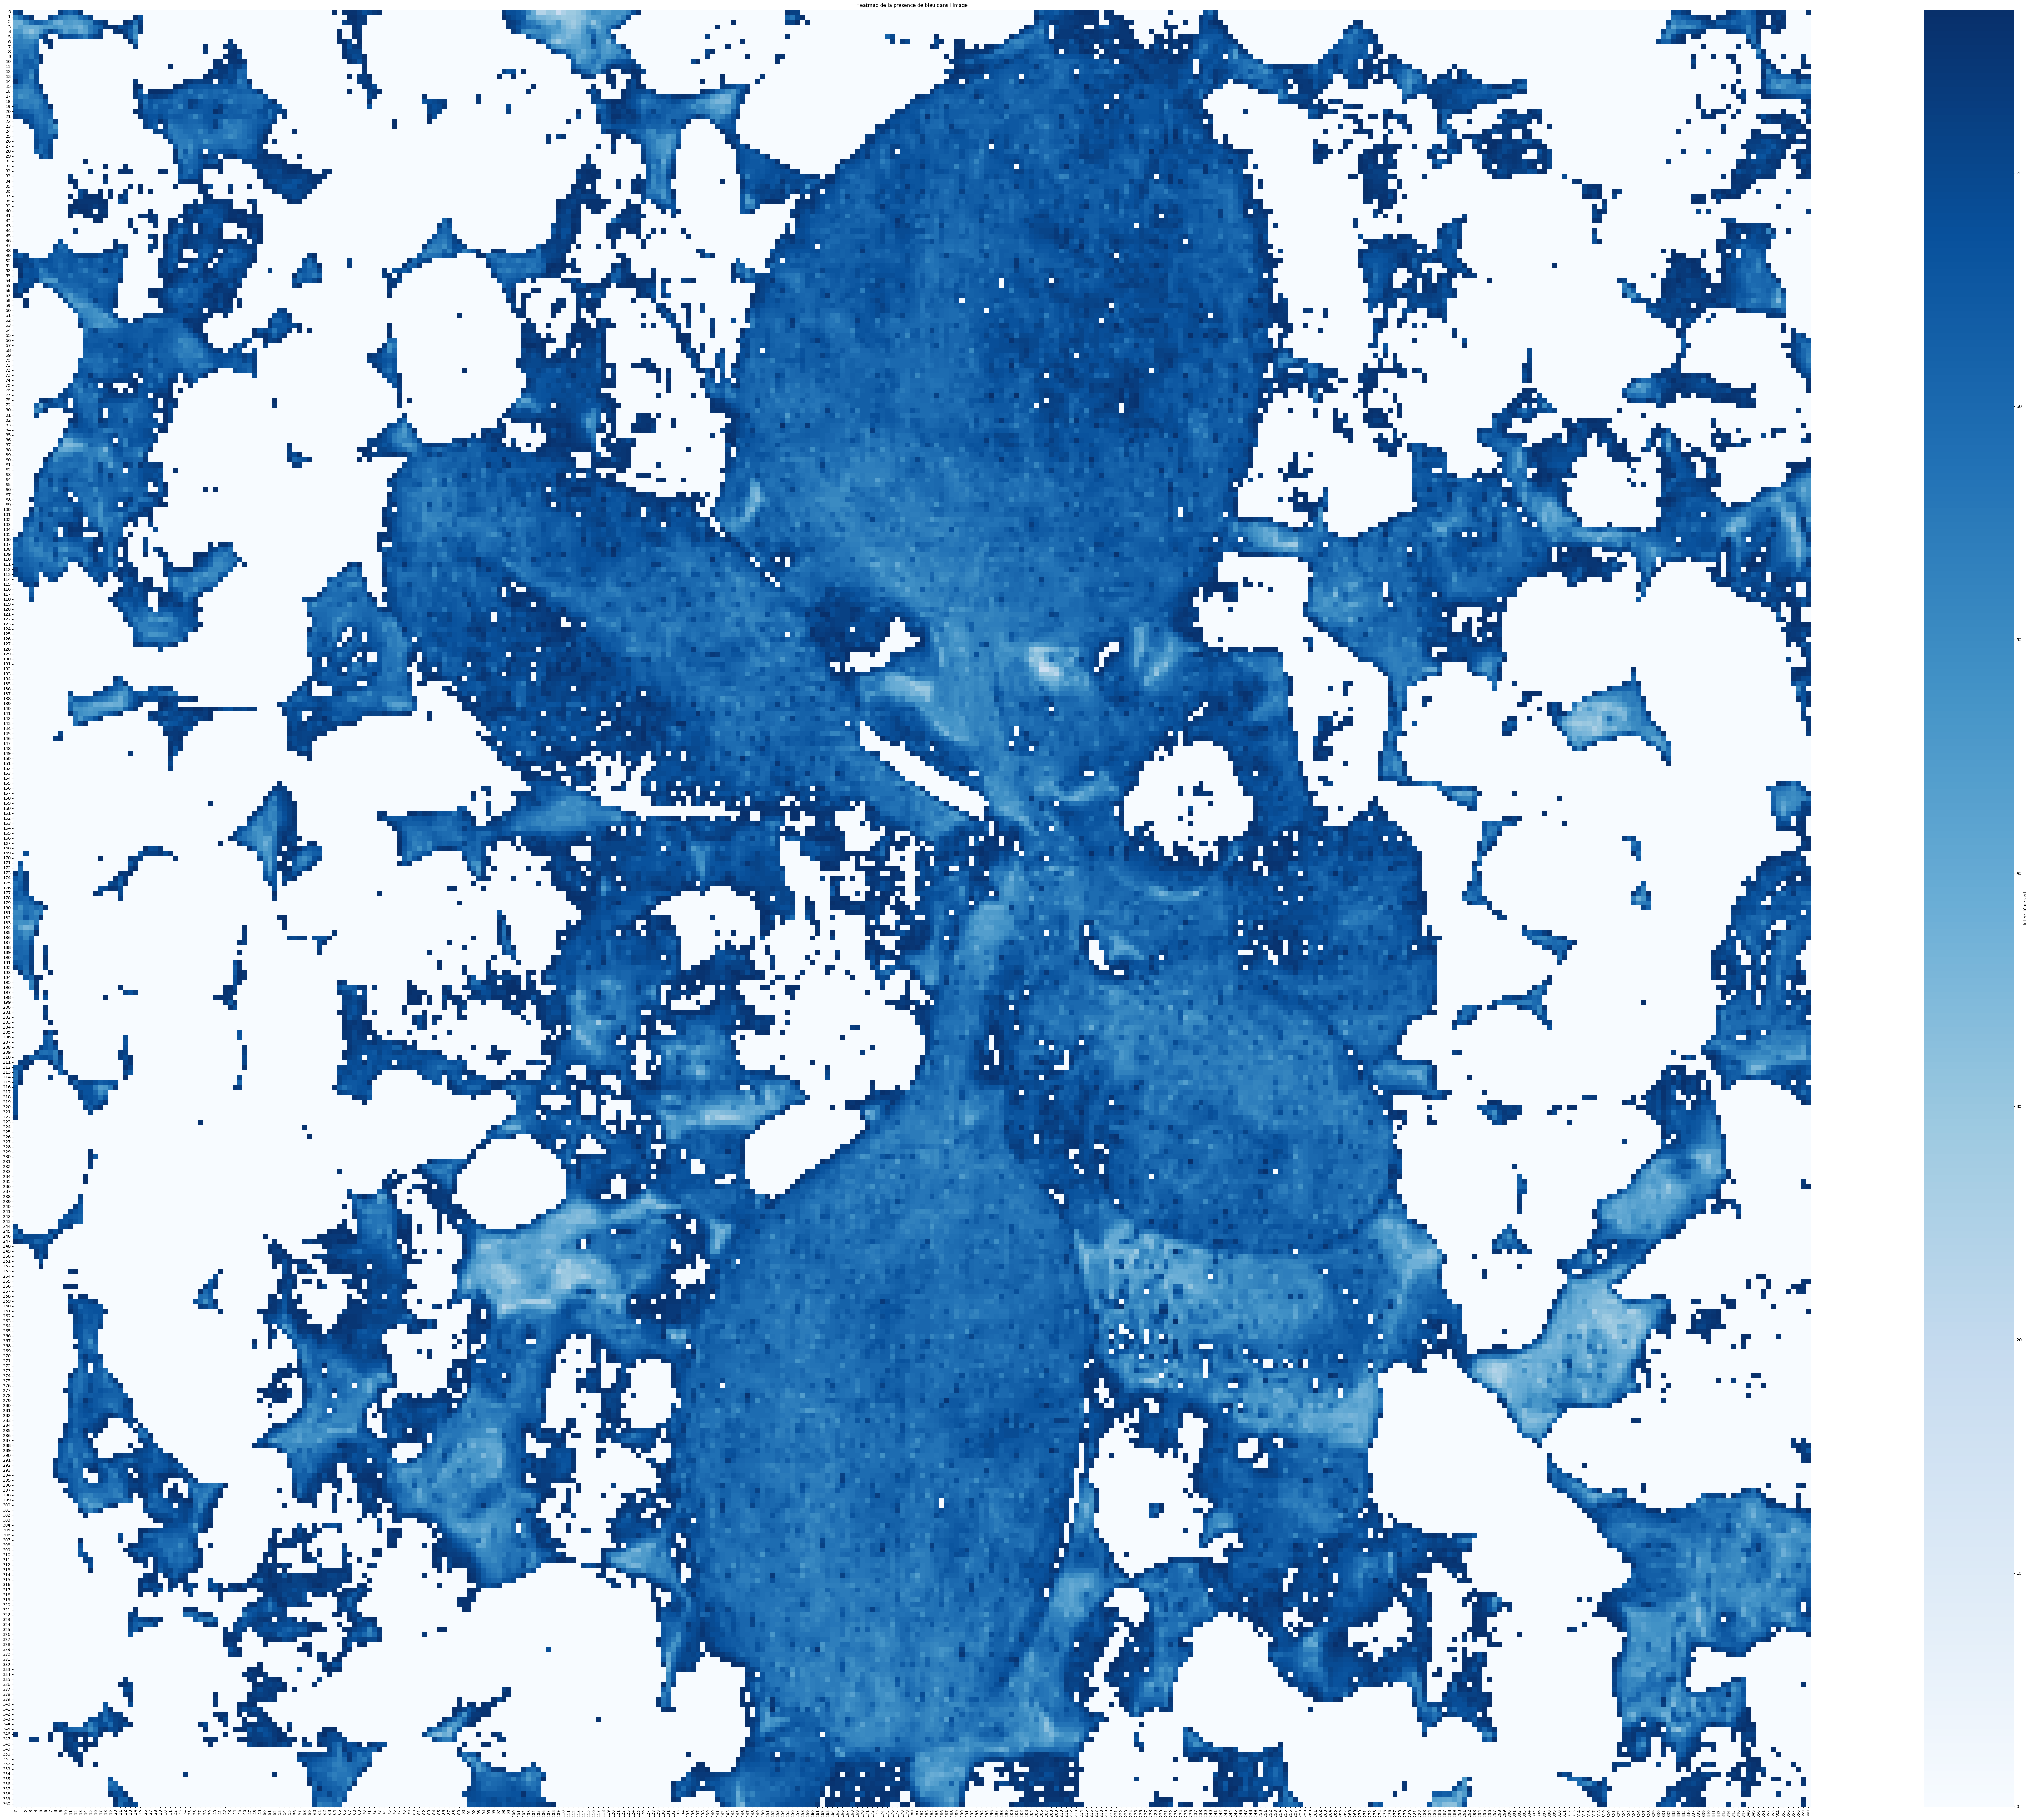

In [8]:
import seaborn as sns

mean_blue = np.mean(blue_channel)

plt.figure(figsize=(100, 80))
filtered_blue_channel = np.where(blue_channel <= mean_blue, blue_channel, 0)

# Afficher la heatmap avec Seaborn
sns.heatmap(filtered_blue_channel, cmap='Blues', cbar_kws={'label': 'Intensité de vert'}, square=True)
#sns.heatmap(blue_channel, cmap='Blues', cbar_kws={'label': 'Intensité de vert'}, square=True)
# Ajouter un titre
plt.title('Heatmap de la présence de bleu dans l\'image')

# Afficher la heatmap
plt.show()

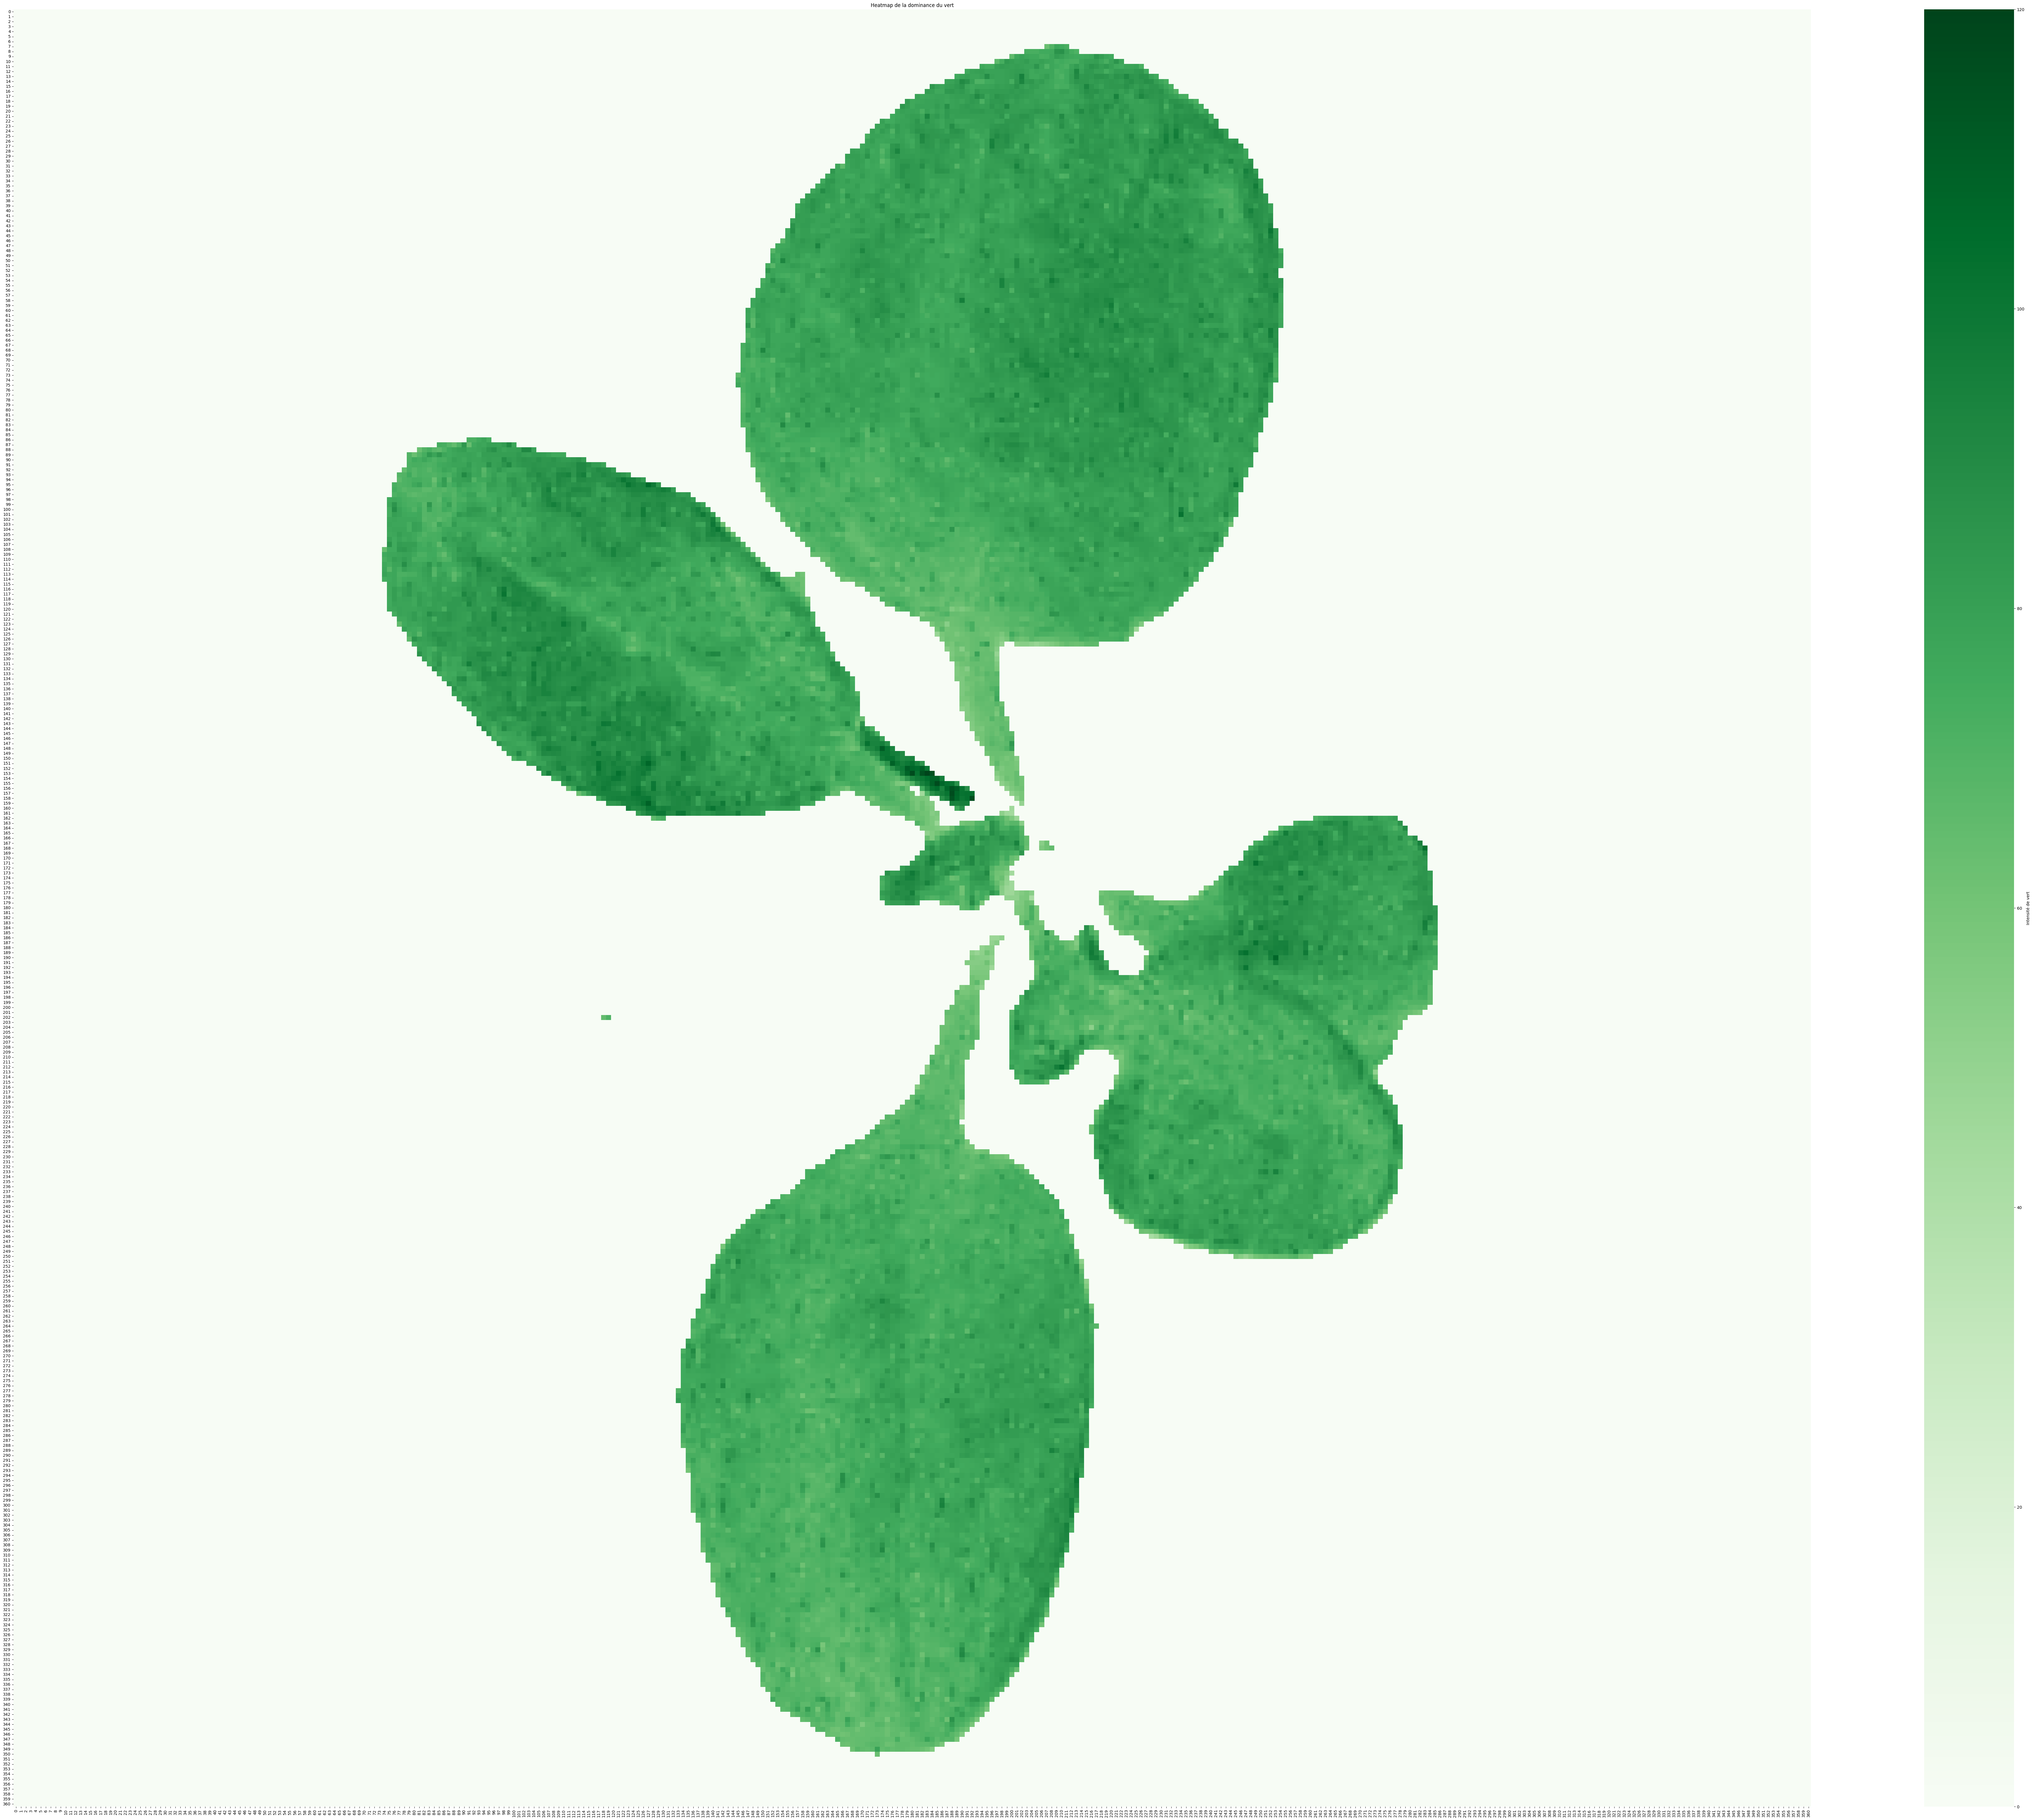

In [13]:
import seaborn as sns

plt.figure(figsize=(100, 80))
filtered_green_channel = np.where(((green_channel > red_channel) & (green_channel > blue_channel)), green_channel, 0)

# Afficher la heatmap avec Seaborn
sns.heatmap(filtered_green_channel, cmap='Greens', cbar_kws={'label': 'Intensité de vert'}, square=True)
# Ajouter un titre
plt.title('Heatmap de la dominance du vert')

# Afficher la heatmap
plt.show()

In [1]:
# boxplot attributs des images
plt.figure(figsize=(8, 6))
plt.boxplot([df['blur'], df['brightness'], df['contrast']], 
            vert=True, patch_artist=True, 
            boxprops=dict(facecolor="lightblue"), 
            medianprops=dict(color="red"))

plt.xticks([1, 2, 3], ["Netteté", "Luminosité", "Contraste"])
plt.ylabel("Valeurs des métriques")
plt.title("Répartition de la netteté, luminosité et contraste des images")
plt.grid(True)

plt.show()

NameError: name 'plt' is not defined

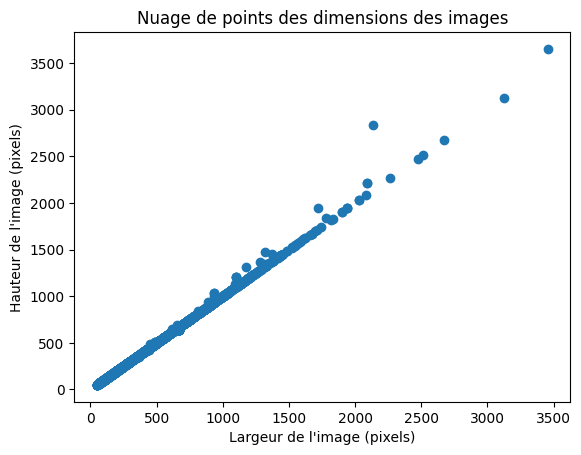

In [13]:
# Affichage de l'histogramme
plt.scatter(df['width'], df['height'])
plt.title("Nuage de points des dimensions des images")
plt.xlabel("Largeur de l'image (pixels)")
plt.ylabel("Hauteur de l'image (pixels)")
plt.show()

[[45 52 60 ... 72 53 48]
 [26 38 51 ... 85 62 50]
 [16 19 31 ... 87 69 53]
 ...
 [65 57 59 ... 49 49 44]
 [64 55 56 ... 50 46 42]
 [67 54 56 ... 50 43 43]]


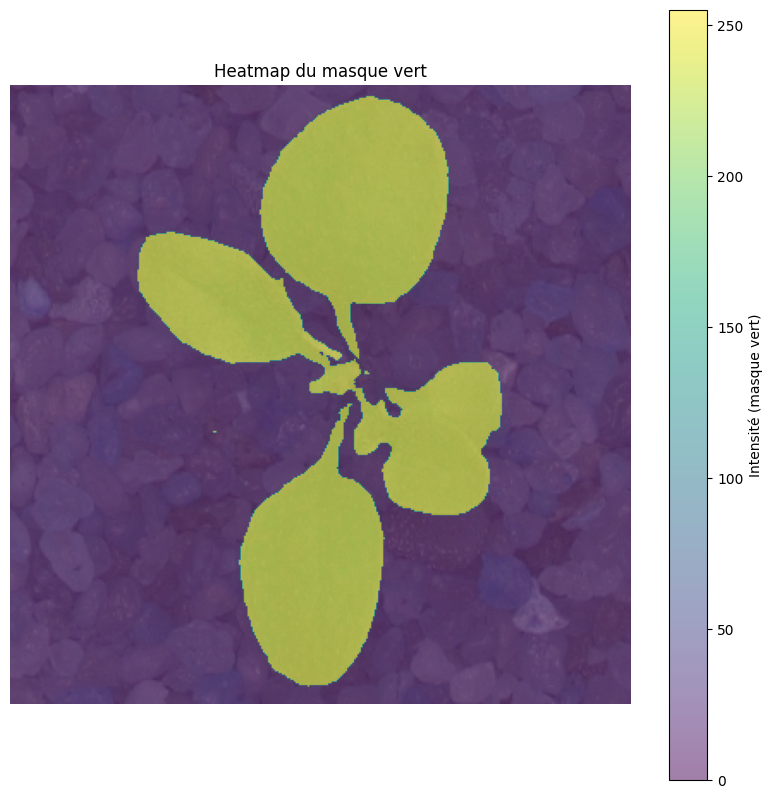

In [11]:
# Extraire les canaux
B, G, R = cv2.split(img)

# Créer un masque où le canal vert domine les autres
green_mask = (G > R) & (G > B)

# Convertir le masque booléen en entier pour visualisation
green_mask_visual = (green_mask * 255).astype(np.uint8)

# Générer la heatmap
plt.figure(figsize=(10, 10))

# Superposer la heatmap sur l'image d'origine
plt.imshow(img, alpha=0.7)  
plt.imshow(green_mask_visual, cmap='viridis', alpha=0.5)

plt.title("Heatmap du masque vert")
plt.axis("off")
plt.colorbar(label="Intensité (masque vert)")
plt.show()